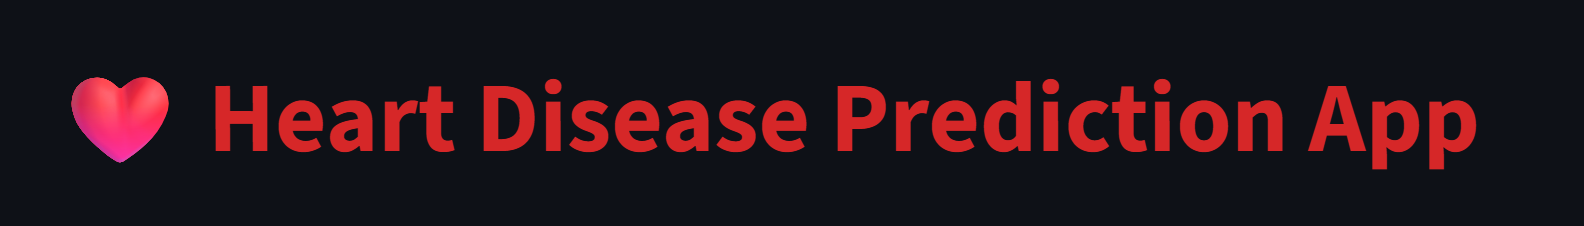

_A Classification-based ML Project_  
**Author:** Wasif Hossain  
🔗 [LinkedIn](https://www.linkedin.com/in/wasif-h) | 📂 [GitHub Repository](https://github.com/wasif-h/Heart_Disease_Prediction)

---

## 📌 Objective
The goal of this project is to build a machine learning model that can **accurately predict the presence of heart disease** in patients based on various health indicators such as age, blood pressure, cholesterol levels, chest pain type, and more.

---

## 🧰 Dataset
We use a structured heart disease dataset containing features like:
- Age
- Sex
- Resting Blood Pressure
- Cholesterol
- Chest Pain Type
- Fasting Blood Sugar
- Maximum Heart Rate
- Exercise-Induced Angina
- ST Depression and Slope
- ...and more

---

## 📊 Techniques Used
- Data Cleaning & Preprocessing  
- Exploratory Data Analysis (EDA)  
- Feature Engineering  
- Label Encoding & One-Hot Encoding  
- Standardization using `StandardScaler`  
- Model Building using **SVM (Support Vector Machine)**  
- Evaluation using Accuracy, Confusion Matrix, etc.  
- Interactive Web App with **Streamlit**

---

## 🎯 Outcome
The final model predicts whether a person is at risk of heart disease with good accuracy, enabling preventive actions and early diagnosis.

---


# Libraries and DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_origin = pd.read_csv(r'https://raw.githubusercontent.com/wasif-h/Heart_Disease_Prediction/refs/heads/main/heart.csv')
df = df_origin.copy()


-------------------------
# Exploratory Data Analysis (EDA)

In [3]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
620,65,M,ASY,120,177,0,Normal,140,N,0.4,Up,0
267,34,M,ATA,98,220,0,Normal,150,N,0.0,Up,0
578,57,M,ASY,156,173,0,LVH,119,Y,3.0,Down,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
867,44,M,ASY,112,290,0,LVH,153,N,0.0,Up,1
629,57,F,ASY,128,303,0,LVH,159,N,0.0,Up,0
217,54,M,NAP,120,217,0,Normal,137,N,0.0,Up,0
563,55,M,ASY,135,204,1,ST,126,Y,1.1,Flat,1
564,57,M,ASY,144,270,1,ST,160,Y,2.0,Flat,1
48,36,M,NAP,112,340,0,Normal,184,N,1.0,Flat,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:

df.duplicated().sum()

np.int64(0)

In [7]:
df['HeartDisease'].value_counts()
# equally distributed

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Visualization of Data Distribution

### Numerical Data - Distribution

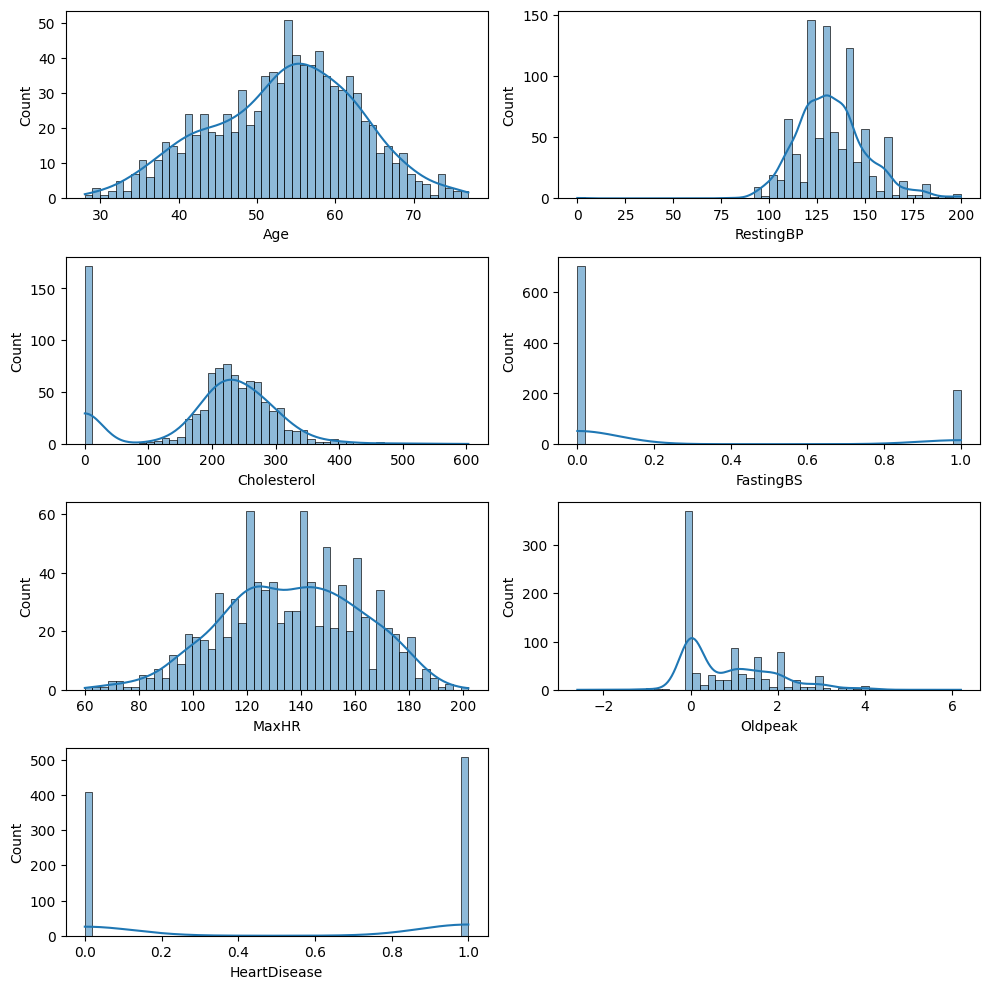

In [9]:
num_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
           'HeartDisease']
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()


for i, column in enumerate(num_col):
    sns.histplot(df[column], ax=axes[i], bins=50, kde=True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

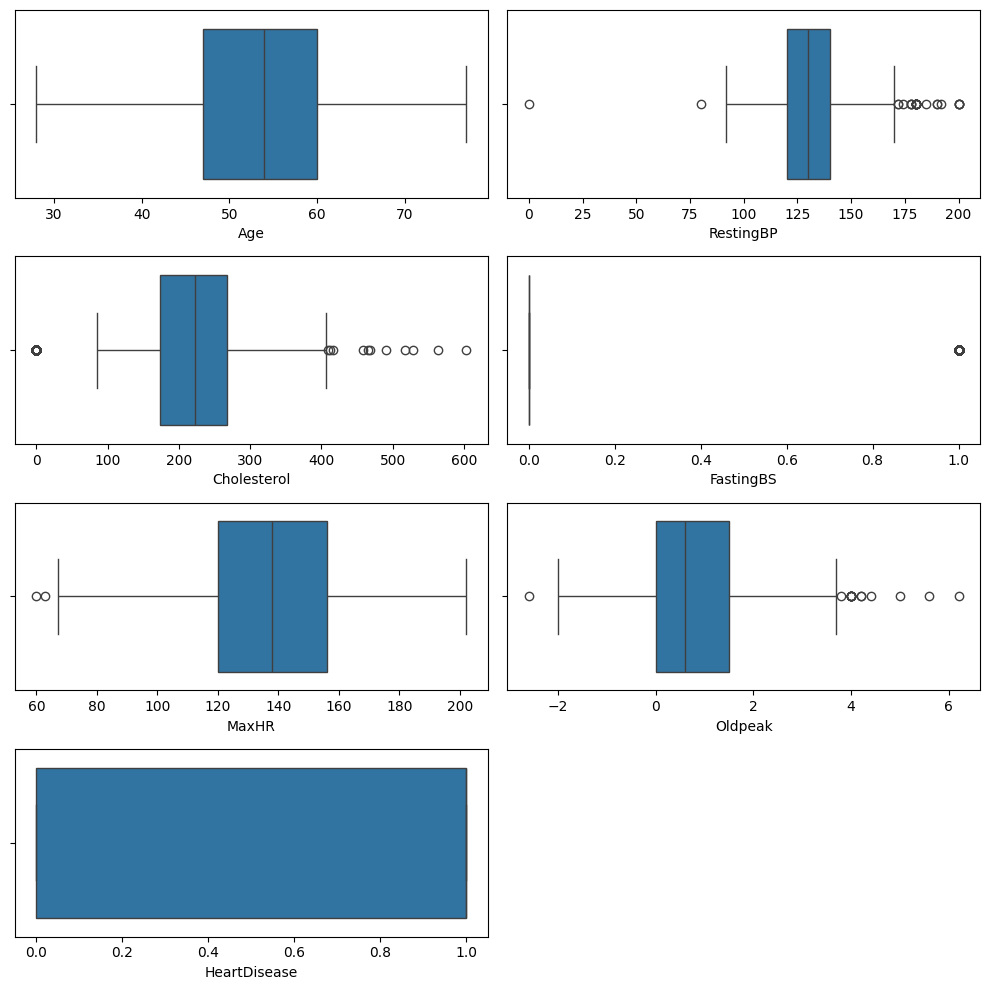

In [10]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()


for i, column in enumerate(num_col):
    sns.boxplot(x = df[column], ax=axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Correlation using Heatmap

<Axes: >

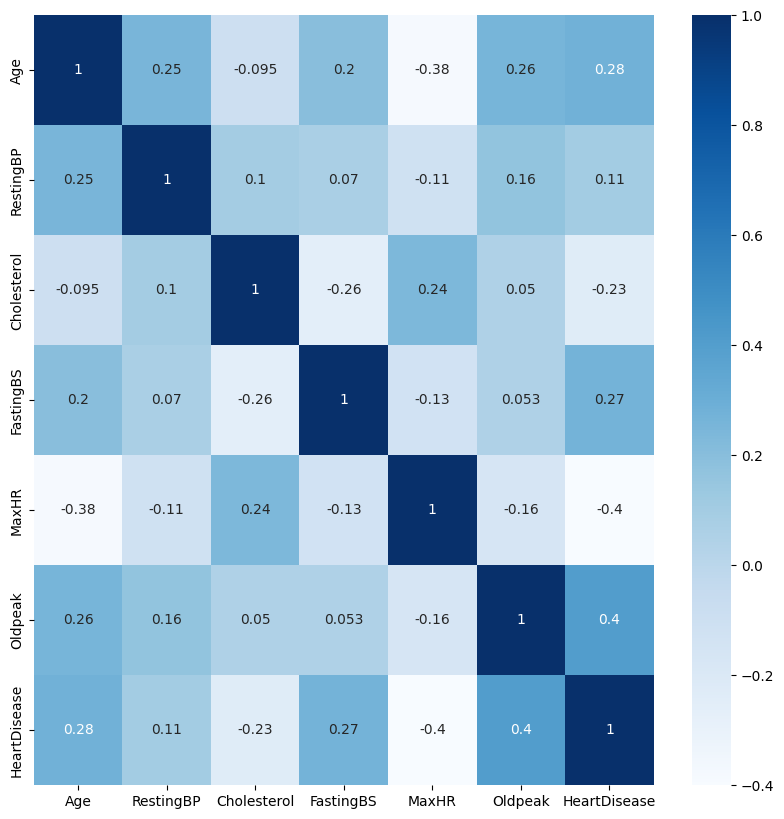

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')

Numeric Conclusion - Drop MaxHR. It is not necessary to train the model

# Categorical Data - Distribution

In [12]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
498,67,M,ASY,160,384,1,ST,130,Y,0.0,Flat,1
422,65,M,ASY,150,236,1,ST,105,Y,0.0,Flat,1
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1


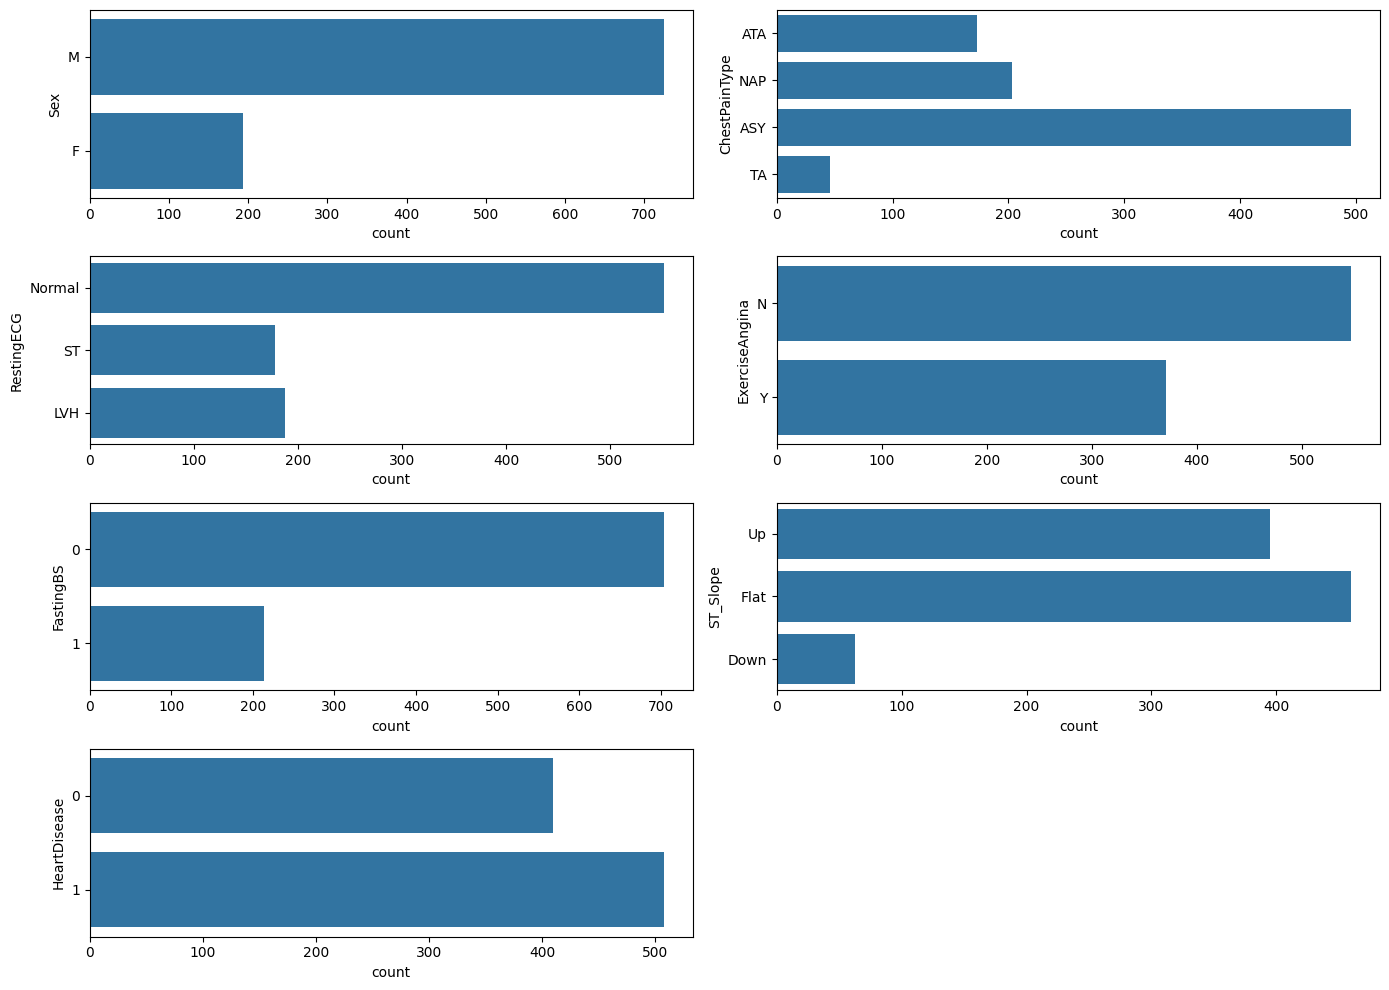

In [13]:
cat_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'FastingBS','ST_Slope','HeartDisease']

fig, axes = plt.subplots(4, 2, figsize=(14, 10))
axes = axes.flatten()

for i, column in enumerate(cat_col):
    sns.countplot(y=df[column], ax=axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

Insight - All categorical columns will be taken to train the model

------------------------------
# Feature Engineering

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
x = df.drop(columns=['HeartDisease','MaxHR'], axis=1)
y = df['HeartDisease']

In [16]:
le = LabelEncoder()
col_name = x.columns
for col in col_name:
  if x[col].dtype == 'object':
    x[col] = le.fit_transform(x[col])

In [17]:
x.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope
327,59,1,0,125,0,1,1,1,0.9,2
776,62,0,0,150,244,0,1,1,1.4,1
267,34,1,1,98,220,0,1,0,0.0,2
210,48,1,0,106,263,1,1,0,0.0,1
24,40,1,2,130,215,0,1,0,0.0,2
490,72,1,2,120,214,0,1,1,1.0,1
615,70,1,0,130,322,0,0,0,2.4,1
22,49,0,1,124,201,0,1,0,0.0,2
419,55,1,0,142,228,0,2,1,2.5,2
795,42,1,2,120,240,1,1,0,0.8,0


In [18]:
scaler = StandardScaler()
x[col_name] = scaler.fit_transform(x[col_name])

# Final Processed Data

In [19]:
x.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope
484,1.218683,0.515952,-0.816995,0.086656,-1.818435,-0.551341,0.017255,1.214246,0.199473,-0.596078
562,0.582246,0.515952,-0.816995,0.410909,0.687864,-0.551341,0.017255,1.214246,1.043759,-0.596078
98,0.264027,0.515952,-0.816995,-0.669935,-1.040933,-0.551341,0.017255,-0.823556,-0.832432,1.052114
133,0.264027,0.515952,-0.816995,0.951331,0.285393,-0.551341,1.601219,1.214246,0.574711,-0.596078
632,-0.054192,0.515952,-0.816995,0.410909,0.038422,1.813758,-1.566710,1.214246,2.075665,-2.244270
280,0.688318,0.515952,1.275059,-0.669935,0.431746,-0.551341,-1.566710,-0.823556,-0.832432,1.052114
575,0.264027,0.515952,-0.816995,0.248782,0.761041,1.813758,0.017255,1.214246,0.293283,-0.596078
690,-0.902775,0.515952,-0.816995,0.518993,1.008012,-0.551341,-1.566710,1.214246,-0.832432,-0.596078
898,-1.963504,0.515952,0.229032,-0.561850,-0.062196,-0.551341,0.017255,-0.823556,-0.832432,1.052114
528,-0.478484,0.515952,1.275059,-0.075471,-0.519550,-0.551341,0.017255,1.214246,0.574711,-0.596078


# Train Test Split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

-------------------------
# Classification Models

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [22]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

results = []

In [23]:

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Name' : name,
        'Accuracy': round(acc*100,4),
        'F1 Score': round(f1*100,4)
    })



In [24]:
result_df = pd.DataFrame(results)
result_df

,Name,Accuracy,F1 Score
0,Logistic Regression,85.3261,86.8293
1,K-Nearest Neighbors,84.2391,85.9903
2,Decision Tree,80.9783,82.9268
3,Support Vector Machine,86.9565,88.6792
4,Naive Bayes,84.7826,86.4078


# We will use SVN to Build our Final Model


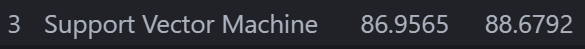

# Exporting Object for Deployment

In [25]:
import joblib
joblib.dump(models['Support Vector Machine'],'heart_model.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(x.columns.tolist(),'columns.pkl')

['columns.pkl']

# Deployment of this Project

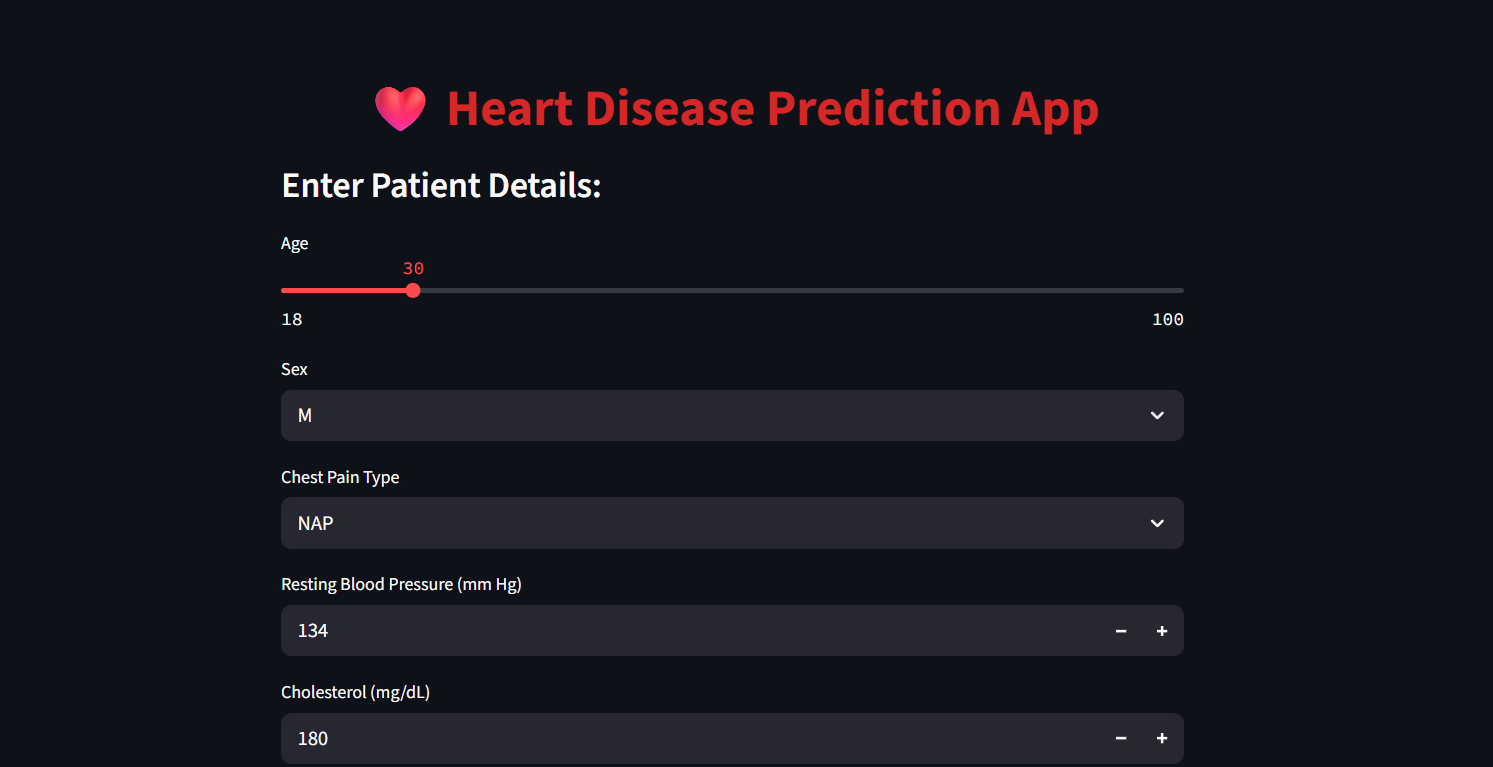

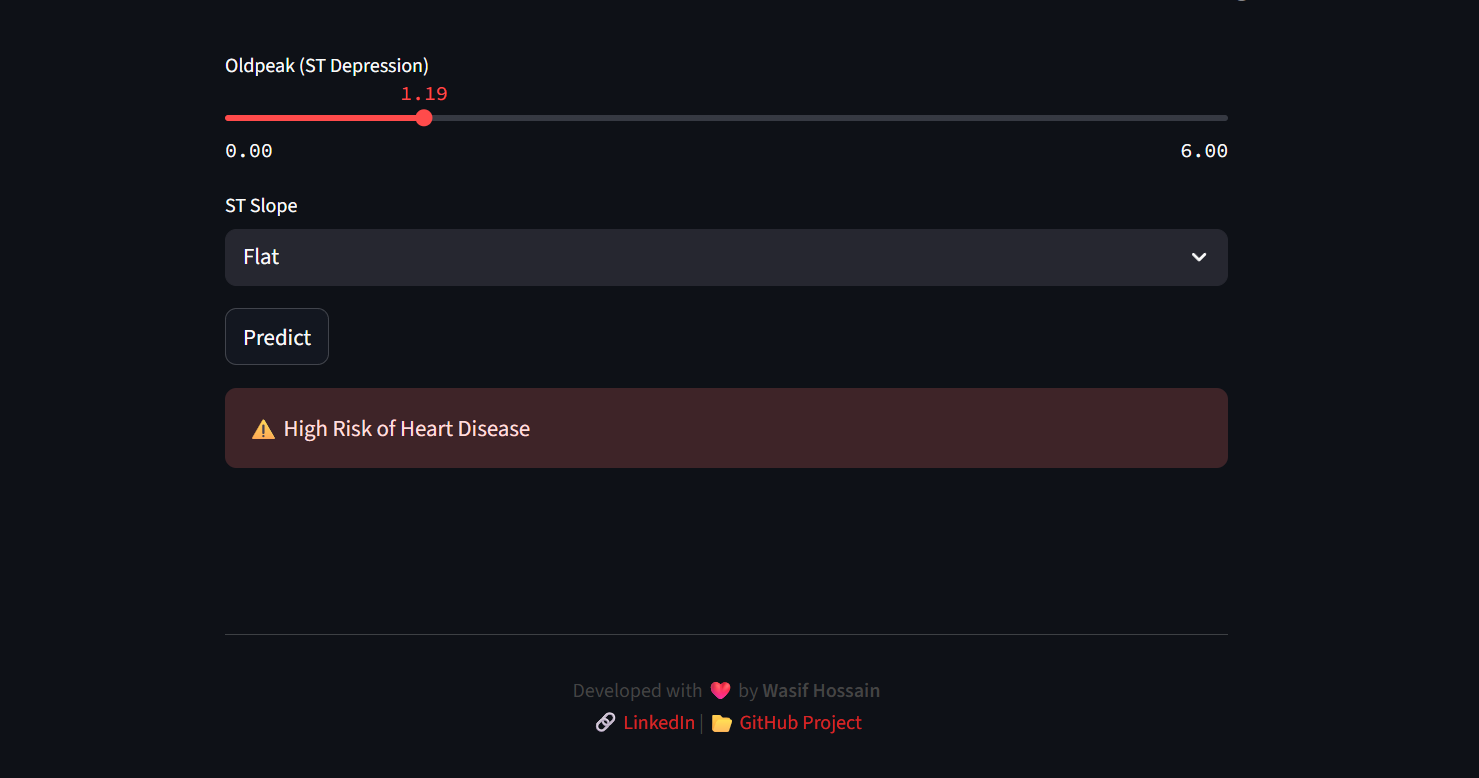